Import example data (more make it up using code developed by you or with AI, just explain it then)

- example choices
  - binomial
  - poisson
  - negative binomial
  - normal 
  - log-normal

Plot the data showing the frequency of your data, with the probability density on the y axis


#### Negative binomial

- describes the number of "successes" over an observation window that is continuous in time or space, where, at any moment in time or space, there is a some probability of success. There is an additional parameter that describes patchiness in success over time and space. (density is variable between areas)
- my example : number of successes would be the number of tardigrades found in a moss sample (searching through microscope)


The negative binomial distribution has two fundamental parameters:

r - The target number of successes (a positive integer)
p - The probability of success on each trial (between 0 and 1)

When we increase r while keeping p constant, the distribution shifts to the right and becomes more spread out, reflecting that we need more trials to achieve more successes. Conversely, when we increase p while keeping r constant, the distribution shifts to the left and becomes more concentrated, indicating fewer trials are typically needed when success is more likely.


Scenario:
You collect 30 moss samples from different rocks.
Each sample is checked under the microscope for tardigrades.

Goal:
Model the number of tardigrades per moss sample using a negative binomial distribution.

Ecological interpretation:

r (shape / aggregation parameter): describes the degree of patchiness (small r → high variability).

p (success probability): related to mean tardigrade density in samples.

Mean tardigrades per sample: 7.73
Variance: 23.26


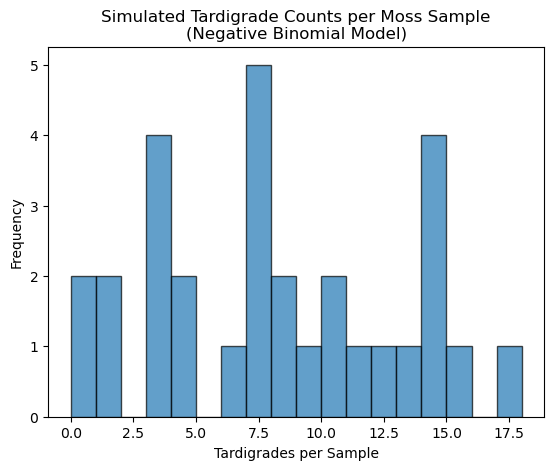

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
mu = 8        # mean tardigrades per moss sample
r = 2         # aggregation (patchiness)
p = r / (r + mu)  # success probability

# Simulate 30 moss samples
samples = nbinom.rvs(r, p, size=30)

# Calculate summary statistics
print(f"Mean tardigrades per sample: {np.mean(samples):.2f}")
print(f"Variance: {np.var(samples):.2f}")

# Plot histogram
plt.hist(samples, bins=range(0, max(samples)+2), edgecolor='black', alpha=0.7)
plt.title('Simulated Tardigrade Counts per Moss Sample\n(Negative Binomial Model)')
plt.xlabel('Tardigrades per Sample')
plt.ylabel('Frequency')
plt.show()


If r = 1, the distribution is very patchy — most samples have few tardigrades, but a few have a lot.

If r → ∞, the model approaches a Poisson distribution — even spread (no patchiness).

Changing μ changes the average density across all moss patches.

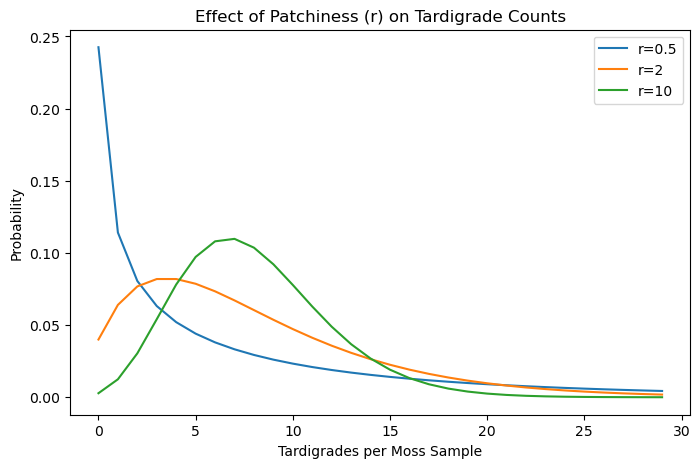

In [5]:

# visualize how different r values affect the distribution (patchiness effects)
r_values = [0.5, 2, 10]
x = np.arange(0, 30)

plt.figure(figsize=(8,5))
for r in r_values:
    p = r / (r + mu)
    plt.plot(x, nbinom.pmf(x, r, p), label=f"r={r}")

plt.title("Effect of Patchiness (r) on Tardigrade Counts")
plt.xlabel("Tardigrades per Moss Sample")
plt.ylabel("Probability")
plt.legend()
plt.show()
